In [1]:
import math

def f(x, gamma):
    """
    utility function for a contestant

    parameters:
    x: expected amount of earnings
    gamme: risk aversion
    """
    return -math.exp(gamma * x)


In [2]:
def ex_cases(n, amount: list[int]):
    """
    expected value of earnings dependant on the number of remaining cases and the amonut in each case

    parameters:
    n: number of remaining cases
    amount: list of amounts in each case
    """
    return sum((1 / n) * amount[n - 1] for n in range(1, len(amount) + 1))

In [3]:
def find_gamma(offer, cases):
  """
  determine the lower bound of gamme by comparing the utility of the banker's offer to the utility of the remaining cases

  calculation:
  u(offer) = -e^-offer
  u(cases) = -e^-(gamma*cases)
  -e^-offer = -e^-(gamma*cases)
  offer = gamma*cases
  gamma = offer/cases

  parameters:
  offer: banker's offer
  cases: expected value of remaining cases
  """
  return offer/cases

We'll run our data through our functions using a dataset

In [4]:
filepath = "Deal or No Deal Data cleaned.csv"

In [6]:
import pandas as pd
import math
import numpy as np

# Read your local CSV file
df = pd.read_csv(filepath)

# Display the first few rows to confirm
print("Original Data:")
df.head(10)

Original Data:


,contestant_id,amounts_opened_per_round,bankers_offer,winnings,case_amount,decision
0,1.0,"25, 0.01, 200, 5, 400, 5000",21000.0,"$25,000.00",$500.00,Deal
1,1.0,"750000, 1000000, 100, 750, 400000",37000.0,"$25,000.00",$500.00,Deal
2,1.0,"50, 10, 100000, 75000",53000.0,"$25,000.00",$500.00,Deal
3,1.0,"1000, 1, 200000",77000.0,"$25,000.00",$500.00,Deal
4,1.0,"10000, 300000",63000.0,"$25,000.00",$500.00,Deal
5,1.0,25000,90000.0,"$25,000.00",$500.00,Deal
6,1.0,300,138000.0,"$25,000.00",$500.00,Deal
7,1.0,500000,17000.0,"$25,000.00",$500.00,Deal
8,1.0,75,25000.0,"$25,000.00",$500.00,Deal
9,2.0,"200, 200000, 25, 50000, 25000, 750000",7000.0,"$189,000.00","$10,000.00",Deal


In [8]:
case_values = [
    0.01, 1, 5, 10, 25, 50, 75, 100, 200, 300, 400, 500, 750, 1000,
    5000, 10000, 25000, 50000, 75000, 100000,
    200000, 300000, 400000, 500000, 750000, 1000000
]


In [9]:
# Clean column names (remove spaces, special chars)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", "")

# Clean monetary values ($ and commas)
def clean_money(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', ''))
    return float(value)

df['bankers_offer'] = df['bankers_offer'].apply(clean_money)
df['winnings'] = df['winnings'].apply(clean_money)
df['case_amount'] = df['case_amount'].apply(clean_money)

# Convert "Amounts Opened Per Round" into a list of numbers
def parse_amounts(amount_str):
    try:
        cleaned = str(amount_str).replace('$', '').replace(',', '')
        return [float(x) for x in cleaned.split(',') if x.strip()]
    except:
        return []

df['amounts_list'] = df['amounts_opened_per_round'].apply(parse_amounts)
df['remaining_cases'] = df['amounts_list'].apply(len)
df.head(10)

,contestant_id,amounts_opened_per_round,bankers_offer,winnings,case_amount,decision,amounts_list,remaining_cases
0,1.0,"25, 0.01, 200, 5, 400, 5000",21000.0,25000.0,500.0,Deal,[],0
1,1.0,"750000, 1000000, 100, 750, 400000",37000.0,25000.0,500.0,Deal,[],0
2,1.0,"50, 10, 100000, 75000",53000.0,25000.0,500.0,Deal,[],0
3,1.0,"1000, 1, 200000",77000.0,25000.0,500.0,Deal,[],0
4,1.0,"10000, 300000",63000.0,25000.0,500.0,Deal,[],0
5,1.0,25000,90000.0,25000.0,500.0,Deal,[25000.0],1
6,1.0,300,138000.0,25000.0,500.0,Deal,[300.0],1
7,1.0,500000,17000.0,25000.0,500.0,Deal,[500000.0],1
8,1.0,75,25000.0,25000.0,500.0,Deal,[75.0],1
9,2.0,"200, 200000, 25, 50000, 25000, 750000",7000.0,189000.0,10000.0,Deal,[],0


In [10]:
df['amounts_opened_per_round'].apply(type).value_counts()

amounts_opened_per_round
<class 'str'>      664
<class 'float'>    330
Name: count, dtype: int64

In [11]:
# convert the string values into floats
def to_float_list(amount_str):
    try:
        return [float(x.strip()) for x in str(amount_str).split(',') if x.strip()]
    except:
        return []
df['amounts_list'] = df['amounts_opened_per_round'].apply(to_float_list)
df.head(10)

,contestant_id,amounts_opened_per_round,bankers_offer,winnings,case_amount,decision,amounts_list,remaining_cases
0,1.0,"25, 0.01, 200, 5, 400, 5000",21000.0,25000.0,500.0,Deal,"[25.0, 0.01, 200.0, 5.0, 400.0, 5000.0]",0
1,1.0,"750000, 1000000, 100, 750, 400000",37000.0,25000.0,500.0,Deal,"[750000.0, 1000000.0, 100.0, 750.0, 400000.0]",0
2,1.0,"50, 10, 100000, 75000",53000.0,25000.0,500.0,Deal,"[50.0, 10.0, 100000.0, 75000.0]",0
3,1.0,"1000, 1, 200000",77000.0,25000.0,500.0,Deal,"[1000.0, 1.0, 200000.0]",0
4,1.0,"10000, 300000",63000.0,25000.0,500.0,Deal,"[10000.0, 300000.0]",0
5,1.0,25000,90000.0,25000.0,500.0,Deal,[25000.0],1
6,1.0,300,138000.0,25000.0,500.0,Deal,[300.0],1
7,1.0,500000,17000.0,25000.0,500.0,Deal,[500000.0],1
8,1.0,75,25000.0,25000.0,500.0,Deal,[75.0],1
9,2.0,"200, 200000, 25, 50000, 25000, 750000",7000.0,189000.0,10000.0,Deal,"[200.0, 200000.0, 25.0, 50000.0, 25000.0, 7500...",0


In [57]:
TOTAL_CASES = 26

def compute_remaining_cases(group):
    cumulative_opened = []
    remaining_list = []

    for amounts in group['amounts_list']:
        cumulative_opened += amounts
        remaining_list.append(TOTAL_CASES - len(cumulative_opened))

    return pd.Series(remaining_list, index=group.index)

# Apply per contestant
df['remaining_cases'] = df.groupby('contestant_id', group_keys=False).apply(compute_remaining_cases)
df.head(10)

,contestant_id,amounts_opened_per_round,bankers_offer,winnings,case_amount,decision,amounts_list,remaining_cases,remaining_case_values,expected_value,gamma,utility
0,1.0,"25, 0.01, 200, 5, 400, 5000",21000.0,25000.0,500.0,Deal,"[25.0, 0.01, 200.0, 5.0, 400.0, 5000.0]",20.0,"[1, 10, 50, 75, 100, 300, 500, 750, 1000, 1000...",170639.300000,0.123067,-0.000000e+00
1,1.0,"750000, 1000000, 100, 750, 400000",37000.0,25000.0,500.0,Deal,"[750000.0, 1000000.0, 100.0, 750.0, 400000.0]",15.0,"[1, 10, 50, 75, 300, 500, 1000, 10000, 25000, ...",84129.066667,0.439800,-0.000000e+00
2,1.0,"50, 10, 100000, 75000",53000.0,25000.0,500.0,Deal,"[50.0, 10.0, 100000.0, 75000.0]",11.0,"[1, 75, 300, 500, 1000, 10000, 25000, 50000, 2...",98806.909091,0.536400,-0.000000e+00
3,1.0,"1000, 1, 200000",77000.0,25000.0,500.0,Deal,"[1000.0, 1.0, 200000.0]",8.0,"[75, 300, 500, 10000, 25000, 50000, 300000, 50...",110734.375000,0.695358,-0.000000e+00
4,1.0,"10000, 300000",63000.0,25000.0,500.0,Deal,"[10000.0, 300000.0]",6.0,"[75, 300, 500, 25000, 50000, 500000]",95979.166667,0.656392,-0.000000e+00
5,1.0,25000,90000.0,25000.0,500.0,Deal,[25000.0],5.0,"[75, 300, 500, 50000, 500000]",110175.000000,0.816882,-0.000000e+00
6,1.0,300,138000.0,25000.0,500.0,Deal,[300.0],4.0,"[75, 500, 50000, 500000]",137643.750000,1.002588,-0.000000e+00
7,1.0,500000,17000.0,25000.0,500.0,Deal,[500000.0],3.0,"[75, 500, 50000]",16858.333333,1.008403,-0.000000e+00
8,1.0,75,25000.0,25000.0,500.0,Deal,[75.0],2.0,"[500, 50000]",25250.000000,0.990099,-0.000000e+00
9,2.0,"200, 200000, 25, 50000, 25000, 750000",7000.0,189000.0,10000.0,Deal,"[200.0, 200000.0, 25.0, 50000.0, 25000.0, 7500...",20.0,"[0.01, 1, 5, 10, 50, 75, 100, 300, 400, 500, 7...",119659.550500,0.058499,-1.440576e-178


In [58]:
# Function to compute remaining values per contestant
def compute_remaining_case_values(group):
    cumulative_opened = []
    remaining_values_per_round = []

    for amounts in group['amounts_list']:
        cumulative_opened += amounts
        # Build the remaining case values by excluding opened ones
        remaining = case_values.copy()
        for opened in cumulative_opened:
            if opened in remaining:
                remaining.remove(opened)  # Only removes the first match
        remaining_values_per_round.append(remaining)

    return pd.Series(remaining_values_per_round, index=group.index)

# Apply per contestant
df['remaining_case_values'] = df.groupby('contestant_id', group_keys=False).apply(compute_remaining_case_values)

df.head(10)

,contestant_id,amounts_opened_per_round,bankers_offer,winnings,case_amount,decision,amounts_list,remaining_cases,remaining_case_values,expected_value,gamma,utility
0,1.0,"25, 0.01, 200, 5, 400, 5000",21000.0,25000.0,500.0,Deal,"[25.0, 0.01, 200.0, 5.0, 400.0, 5000.0]",20.0,"[1, 10, 50, 75, 100, 300, 500, 750, 1000, 1000...",170639.300000,0.123067,-0.000000e+00
1,1.0,"750000, 1000000, 100, 750, 400000",37000.0,25000.0,500.0,Deal,"[750000.0, 1000000.0, 100.0, 750.0, 400000.0]",15.0,"[1, 10, 50, 75, 300, 500, 1000, 10000, 25000, ...",84129.066667,0.439800,-0.000000e+00
2,1.0,"50, 10, 100000, 75000",53000.0,25000.0,500.0,Deal,"[50.0, 10.0, 100000.0, 75000.0]",11.0,"[1, 75, 300, 500, 1000, 10000, 25000, 50000, 2...",98806.909091,0.536400,-0.000000e+00
3,1.0,"1000, 1, 200000",77000.0,25000.0,500.0,Deal,"[1000.0, 1.0, 200000.0]",8.0,"[75, 300, 500, 10000, 25000, 50000, 300000, 50...",110734.375000,0.695358,-0.000000e+00
4,1.0,"10000, 300000",63000.0,25000.0,500.0,Deal,"[10000.0, 300000.0]",6.0,"[75, 300, 500, 25000, 50000, 500000]",95979.166667,0.656392,-0.000000e+00
5,1.0,25000,90000.0,25000.0,500.0,Deal,[25000.0],5.0,"[75, 300, 500, 50000, 500000]",110175.000000,0.816882,-0.000000e+00
6,1.0,300,138000.0,25000.0,500.0,Deal,[300.0],4.0,"[75, 500, 50000, 500000]",137643.750000,1.002588,-0.000000e+00
7,1.0,500000,17000.0,25000.0,500.0,Deal,[500000.0],3.0,"[75, 500, 50000]",16858.333333,1.008403,-0.000000e+00
8,1.0,75,25000.0,25000.0,500.0,Deal,[75.0],2.0,"[500, 50000]",25250.000000,0.990099,-0.000000e+00
9,2.0,"200, 200000, 25, 50000, 25000, 750000",7000.0,189000.0,10000.0,Deal,"[200.0, 200000.0, 25.0, 50000.0, 25000.0, 7500...",20.0,"[0.01, 1, 5, 10, 50, 75, 100, 300, 400, 500, 7...",119659.550500,0.058499,-1.440576e-178


In [59]:
def utility(x, gamma):
    try:
        return -math.exp(-gamma * x) if not pd.isna(gamma) else np.nan
    except:
        return np.nan

def expected_value(n, amounts):
    try:
        return sum(amounts)/n if (n > 0 and amounts) else np.nan
    except:
        return np.nan

def find_gamma(offer, cases):
    try:
        return offer/cases if (cases != 0 and not pd.isna(cases)) else np.nan
    except:
        return np.nan

In [60]:
df['expected_value'] = df.apply(
    lambda r: np.mean(r['remaining_case_values']) if r['remaining_case_values'] else np.nan,
    axis=1
)

df['gamma'] = df.apply(
    lambda r: find_gamma(r['bankers_offer'], r['expected_value']),
    axis=1
)

df['utility'] = df.apply(
    lambda r: utility(r['bankers_offer'], r['gamma']),
    axis=1
)

In [70]:
available_columns = [
    col for col in [
        'contestant_id',
        'amounts_opened_per_round',
        'bankers_offer',
        'expected_value',
        'gamma',
        'utility',
        'decision'
    ] if col in df.columns
]

# df.dropna(inplace=True)
results = df[available_columns]

pd.set_option('display.max_rows', None)  # Show all rows

# Return the full DataFrame
# results

df.head(10)

,contestant_id,amounts_opened_per_round,bankers_offer,winnings,case_amount,decision,amounts_list,remaining_cases,remaining_case_values,expected_value,gamma,utility
0,1.0,"25, 0.01, 200, 5, 400, 5000",21000.0,25000.0,500.0,Deal,"[25.0, 0.01, 200.0, 5.0, 400.0, 5000.0]",20.0,"[1, 10, 50, 75, 100, 300, 500, 750, 1000, 1000...",170639.300000,0.123067,-0.000000e+00
1,1.0,"750000, 1000000, 100, 750, 400000",37000.0,25000.0,500.0,Deal,"[750000.0, 1000000.0, 100.0, 750.0, 400000.0]",15.0,"[1, 10, 50, 75, 300, 500, 1000, 10000, 25000, ...",84129.066667,0.439800,-0.000000e+00
2,1.0,"50, 10, 100000, 75000",53000.0,25000.0,500.0,Deal,"[50.0, 10.0, 100000.0, 75000.0]",11.0,"[1, 75, 300, 500, 1000, 10000, 25000, 50000, 2...",98806.909091,0.536400,-0.000000e+00
3,1.0,"1000, 1, 200000",77000.0,25000.0,500.0,Deal,"[1000.0, 1.0, 200000.0]",8.0,"[75, 300, 500, 10000, 25000, 50000, 300000, 50...",110734.375000,0.695358,-0.000000e+00
4,1.0,"10000, 300000",63000.0,25000.0,500.0,Deal,"[10000.0, 300000.0]",6.0,"[75, 300, 500, 25000, 50000, 500000]",95979.166667,0.656392,-0.000000e+00
5,1.0,25000,90000.0,25000.0,500.0,Deal,[25000.0],5.0,"[75, 300, 500, 50000, 500000]",110175.000000,0.816882,-0.000000e+00
6,1.0,300,138000.0,25000.0,500.0,Deal,[300.0],4.0,"[75, 500, 50000, 500000]",137643.750000,1.002588,-0.000000e+00
7,1.0,500000,17000.0,25000.0,500.0,Deal,[500000.0],3.0,"[75, 500, 50000]",16858.333333,1.008403,-0.000000e+00
8,1.0,75,25000.0,25000.0,500.0,Deal,[75.0],2.0,"[500, 50000]",25250.000000,0.990099,-0.000000e+00
9,2.0,"200, 200000, 25, 50000, 25000, 750000",7000.0,189000.0,10000.0,Deal,"[200.0, 200000.0, 25.0, 50000.0, 25000.0, 7500...",20.0,"[0.01, 1, 5, 10, 50, 75, 100, 300, 400, 500, 7...",119659.550500,0.058499,-1.440576e-178


C:\Users\Thomas\AppData\Local\Temp\ipykernel_8168\1366080226.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


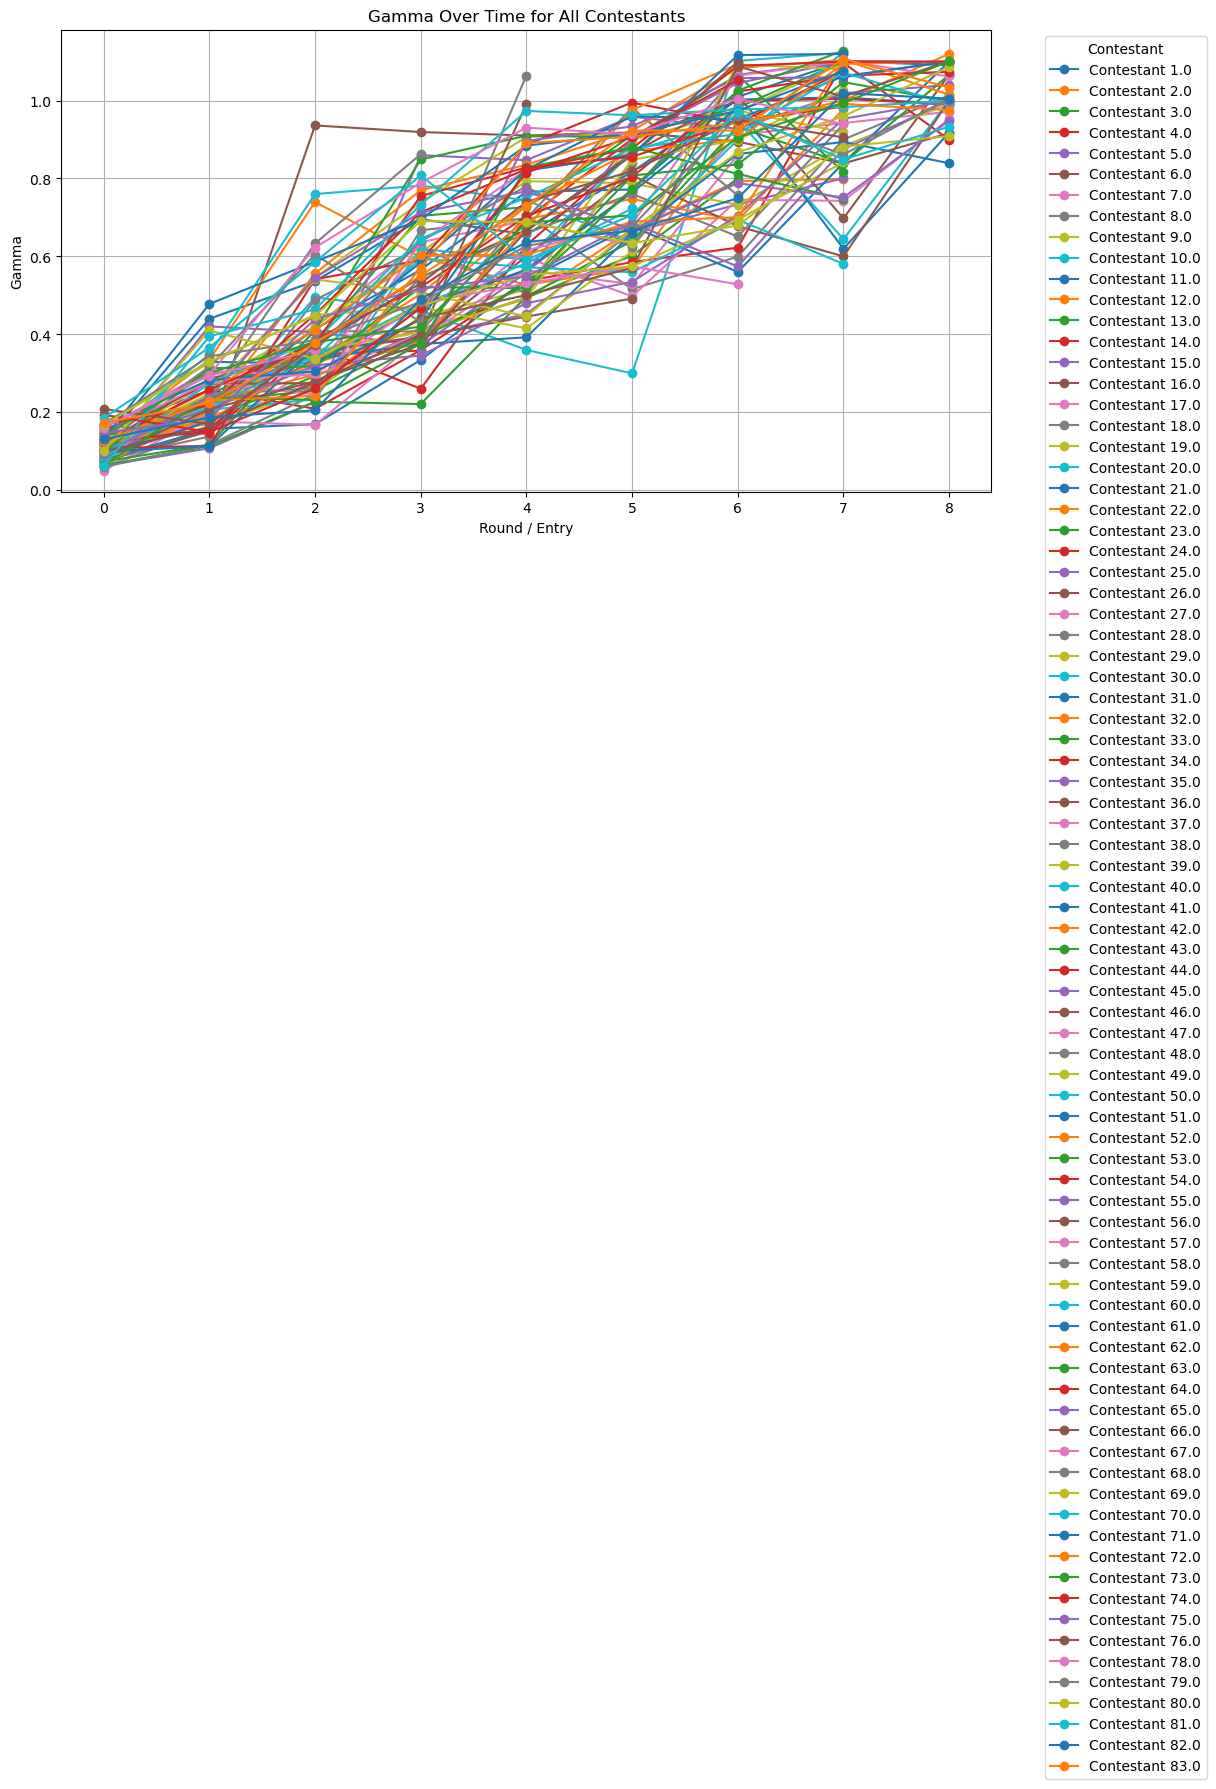

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for necessary columns
if 'contestant_id' in df.columns and 'gamma' in df.columns:
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Loop through each contestant and plot their gamma
    for contestant_id, group in df.groupby('contestant_id'):
        group = group.reset_index(drop=True)
        plt.plot(group.index, group['gamma'], label=f'Contestant {contestant_id}', marker='o')

    # Add labels and legend
    plt.title('Gamma Over Time for All Contestants')
    plt.xlabel('Round / Entry')
    plt.ylabel('Gamma')
    plt.legend(title='Contestant', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [72]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Check for necessary columns
# if 'contestant_id' in df.columns and 'gamma' in df.columns:
#     # Get unique contestants
#     unique_contestants = df['contestant_id'].unique()

#     # Loop through each contestant
#     for contestant in unique_contestants:
#         contestant_data = df[df['contestant_id'] == contestant].copy()
#         contestant_data.reset_index(drop=True, inplace=True)

#         plt.figure(figsize=(8, 4))
#         plt.plot(contestant_data.index, contestant_data['gamma'], marker='o', linestyle='-')
#         plt.title(f'Gamma Over Time - Contestant {contestant}')
#         plt.xlabel('Round / Entry')
#         plt.ylabel('Gamma')
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()

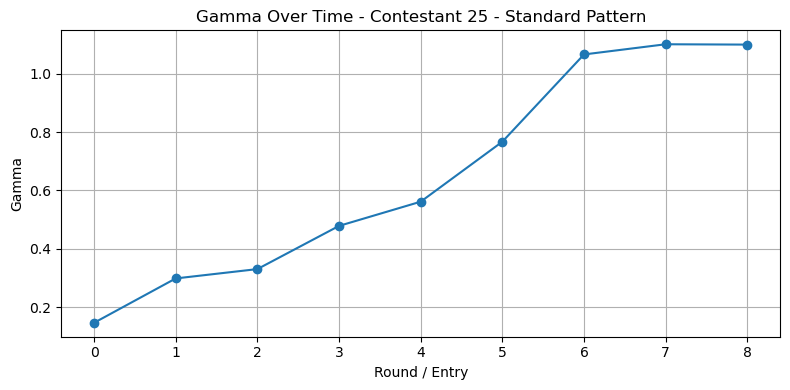

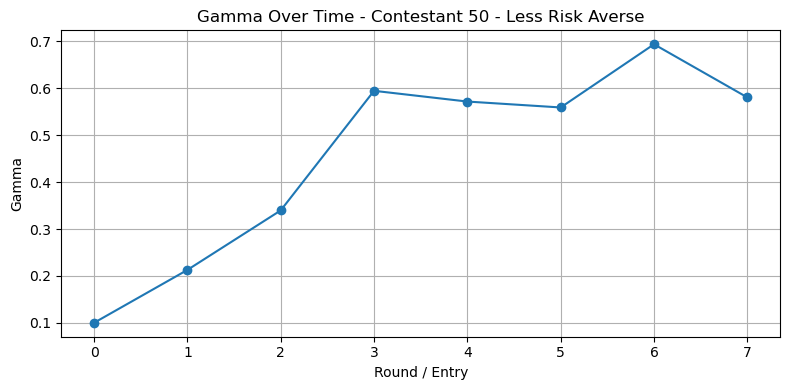

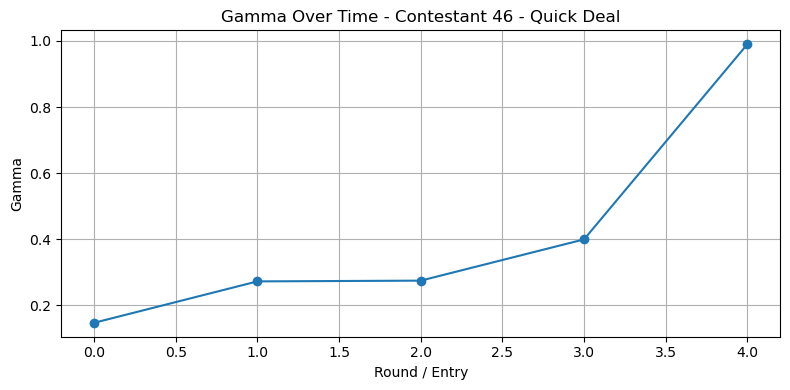

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

contestant_id = 25

# Check for necessary columns
if 'contestant_id' in df.columns and 'gamma' in df.columns:
    # Filter data for that contestant
    contestant_data = df[df['contestant_id'] == contestant_id].copy()
    contestant_data.reset_index(drop=True, inplace=True)

    # Plot gamma over time
    plt.figure(figsize=(8, 4))
    plt.plot(contestant_data.index, contestant_data['gamma'], marker='o', linestyle='-')
    plt.title(f'Gamma Over Time - Contestant {contestant_id} - Standard Pattern')
    plt.xlabel('Round / Entry')
    plt.ylabel('Gamma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

contestant_id = 50
if 'contestant_id' in df.columns and 'gamma' in df.columns:
    # Filter data for that contestant
    contestant_data = df[df['contestant_id'] == contestant_id].copy()
    contestant_data.reset_index(drop=True, inplace=True)

    # Plot gamma over time
    plt.figure(figsize=(8, 4))
    plt.plot(contestant_data.index, contestant_data['gamma'], marker='o', linestyle='-')
    plt.title(f'Gamma Over Time - Contestant {contestant_id} - Less Risk Averse')
    plt.xlabel('Round / Entry')
    plt.ylabel('Gamma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

contestant_id = 46
if 'contestant_id' in df.columns and 'gamma' in df.columns:
    # Filter data for that contestant
    contestant_data = df[df['contestant_id'] == contestant_id].copy()
    contestant_data.reset_index(drop=True, inplace=True)

    # Plot gamma over time
    plt.figure(figsize=(8, 4))
    plt.plot(contestant_data.index, contestant_data['gamma'], marker='o', linestyle='-')
    plt.title(f'Gamma Over Time - Contestant {contestant_id} - Quick Deal')
    plt.xlabel('Round / Entry')
    plt.ylabel('Gamma')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

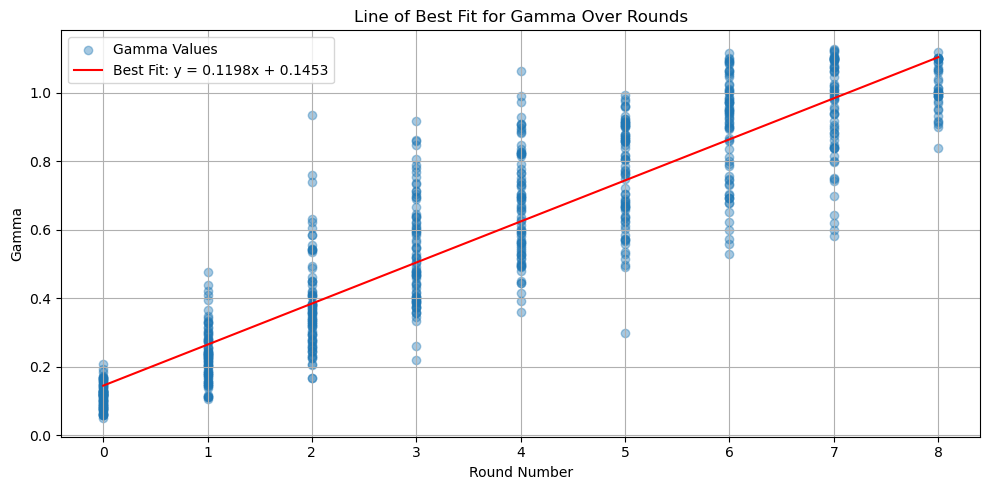

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure required columns exist
if 'contestant_id' in df.columns and 'gamma' in df.columns:
    round_numbers = []
    gammas = []

    # Build a list of round numbers and corresponding gamma values
    for _, group in df.groupby('contestant_id'):
        group = group.reset_index(drop=True)
        round_numbers.extend(group.index.tolist())
        gammas.extend(group['gamma'].tolist())

    # Convert to numpy arrays
    x = np.array(round_numbers)
    y = np.array(gammas)

    # Remove NaN values (if any)
    valid = ~np.isnan(y)
    x = x[valid]
    y = y[valid]

    # Fit a linear regression line: y = m*x + b
    coeffs = np.polyfit(x, y, 1)
    m, b = coeffs

    # Generate predicted y values
    y_fit = m * x + b

    # Plot original data and line of best fit
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, alpha=0.4, label='Gamma Values')
    plt.plot(x, y_fit, color='red', label=f'Best Fit: y = {m:.4f}x + {b:.4f}')
    plt.xlabel('Round Number')
    plt.ylabel('Gamma')
    plt.title('Line of Best Fit for Gamma Over Rounds')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'contestant_id' and 'gamma' are not in the DataFrame.")
